<a href="https://colab.research.google.com/github/IshaanChawla0001/python-project/blob/main/ishaan_final_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np
import datetime
import pandas_datareader as web
import pandas as pd
import seaborn as sb
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [182]:
# pandas_datareader library allows us to connect to the website and extract data directly from internet sources in our case we are extracting data from Yahoo Finance API.
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)
# Read & display the data for Apple
dfa = web.DataReader("AAPL", 'yahoo', start, end)
dfa.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-28,29.504999,29.049999,29.379999,29.190001,83623600.0,27.420895
2016-12-29,29.277500,29.100000,29.112499,29.182501,60158000.0,27.413847
2016-12-30,29.299999,28.857500,29.162500,28.955000,122345200.0,27.200134
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.277639
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.247108
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.385668
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.690971
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.944603
2017-01-10,29.844999,29.575001,29.692499,29.777500,97848400.0,27.972786


In [183]:
close_px = dfa['High']
mavg = close_px.rolling(window=100).mean()
mavg

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2017-01-05    28.251025
2017-01-06    28.272575
2017-01-09    28.295575
2017-01-10    28.320600
2017-01-11    28.346425
Name: High, Length: 1769, dtype: float64

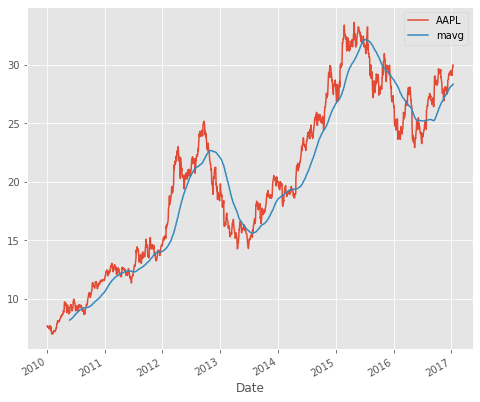

In [184]:
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [185]:
# Read & display the data for Netflix
dfn = web.DataReader("NFLX", 'yahoo', start, end)
dfn.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-28,129.070007,125.760002,129.070007,125.889999,4389200.0,125.889999
2016-12-29,126.139999,124.199997,125.949997,125.330002,3445100.0,125.330002
2016-12-30,126.570000,123.599998,126.239998,123.800003,4455400.0,123.800003
2017-01-03,128.190002,124.309998,124.959999,127.489998,9437900.0,127.489998
2017-01-04,130.169998,126.550003,127.489998,129.410004,7843600.0,129.410004
2017-01-05,132.750000,128.899994,129.220001,131.809998,10185500.0,131.809998
2017-01-06,133.880005,129.809998,132.080002,131.070007,10657900.0,131.070007
2017-01-09,131.990005,129.889999,131.479996,130.949997,5771800.0,130.949997
2017-01-10,132.220001,129.289993,131.270004,129.889999,5985800.0,129.889999


In [186]:
# Read & display the data for Microsoft
dfm = web.DataReader("MSFT", 'yahoo', start, end)
dfm.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-28,63.400002,62.830002,63.400002,62.990002,14653300.0,59.057655
2016-12-29,63.200001,62.730000,62.860001,62.900002,10250600.0,58.973270
2016-12-30,62.990002,62.029999,62.959999,62.139999,25579900.0,58.260712
2017-01-03,62.840000,62.130001,62.790001,62.580002,20694100.0,58.673244
2017-01-04,62.750000,62.119999,62.480000,62.299999,21340000.0,58.410725
2017-01-05,62.660000,62.029999,62.189999,62.299999,24876000.0,58.410725
2017-01-06,63.150002,62.040001,62.299999,62.840000,19922900.0,58.917015
2017-01-09,63.080002,62.540001,62.759998,62.639999,20382700.0,58.729496
2017-01-10,63.070000,62.279999,62.730000,62.619999,18593000.0,58.710747


In [187]:
# Read & display the data for Google
dfg = web.DataReader("GOOG", 'yahoo', start, end)
dfg.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-28,794.229980,783.200012,793.700012,785.049988,1153800.0,785.049988
2016-12-29,785.929993,778.919983,783.330017,782.789978,744300.0,782.789978
2016-12-30,782.780029,770.409973,782.750000,771.820007,1770000.0,771.820007
2017-01-03,789.630005,775.799988,778.809998,786.140015,1657300.0,786.140015
2017-01-04,791.340027,783.159973,788.359985,786.900024,1073000.0,786.900024
2017-01-05,794.479980,785.020020,786.080017,794.020020,1335200.0,794.020020
2017-01-06,807.900024,792.203979,795.260010,806.150024,1640200.0,806.150024
2017-01-09,809.966003,802.830017,806.400024,806.650024,1274600.0,806.650024
2017-01-10,809.130005,803.510010,807.859985,804.789978,1176800.0,804.789978


In [188]:
# Pandas reset_index() is a method to reset index of a Data Frame. reset_index() method sets a list of integer ranging from 0 to length of data as index.
dfa.reset_index(inplace=True)
dfn.reset_index(inplace=True)
dfm.reset_index(inplace=True)
dfg.reset_index(inplace=True)
dfa

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.539882
1,2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.551187
2,2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.446983
3,2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.435065
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.477847
...,...,...,...,...,...,...,...
1764,2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.385668
1765,2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.690971
1766,2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.944603
1767,2017-01-10,29.844999,29.575001,29.692499,29.777500,97848400.0,27.972786


In [189]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
dfa.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1769.000000,1769.000000,1769.000000,1769.000000,1.769000e+03,1769.000000
mean,20.072649,19.697763,19.894219,19.888647,3.758507e+08,17.729864
std,7.150999,7.038787,7.095451,7.094345,2.409303e+08,6.755639
min,7.000000,6.794643,6.870357,6.858929,4.590360e+07,5.868809
25%,13.994286,13.714286,13.863571,13.886071,1.958040e+08,11.881549
50%,19.888929,19.457857,19.768572,19.686787,3.218404e+08,17.254862
75%,26.342501,25.782499,26.020000,26.084999,4.837532e+08,23.924532
max,33.634998,32.849998,33.615002,33.250000,1.880998e+09,30.182924


In [190]:
dfn.describe()
dfm.describe()
dfg.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1769.000000,1769.000000,1769.000000,1769.000000,1.769000e+03,1769.000000
mean,464.821137,456.989344,461.133735,460.959376,4.040736e+06,460.959376
std,176.169983,173.550725,174.956705,174.905273,2.932247e+06,174.905273
min,220.314209,216.005356,218.336624,217.220810,7.900000e+03,217.220810
25%,301.101410,295.910858,298.615723,298.575867,1.885500e+06,298.575867
50%,439.726807,434.904877,437.275970,437.126556,3.628100e+06,437.126556
75%,582.909607,573.500366,579.409241,579.419189,5.140300e+06,579.419189
max,816.679993,805.140015,816.679993,813.109985,2.976060e+07,813.109985


In [191]:
# Correlation is a measure of association or dependency between two features i.e. how much Y will vary with a variation in X. The correlation method that we will use is the Pearson Correlation.
# this is the correlation of apple stock with its features like high ,low etc.
corra = dfa.corr(method='pearson')
corra

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999512,0.999675,0.999661,-0.581044,0.997658
Low,0.999512,1.000000,0.999606,0.999659,-0.593990,0.997817
Open,0.999675,0.999606,1.000000,0.999258,-0.585167,0.997256
Close,0.999661,0.999659,0.999258,1.000000,-0.588024,0.998087
Volume,-0.581044,-0.593990,-0.585167,-0.588024,1.000000,-0.604144
Adj Close,0.997658,0.997817,0.997256,0.998087,-0.604144,1.000000


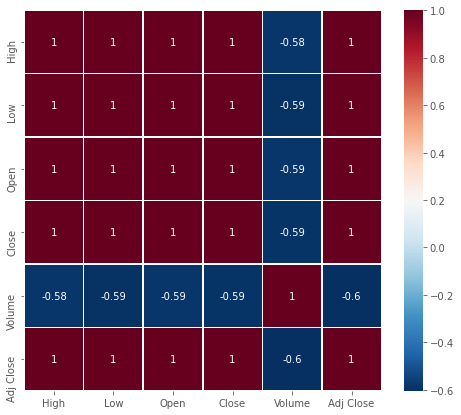

In [192]:
# Not all text is understandable, lets visualize the correlation coefficient.
sb.heatmap(corra,xticklabels=corra.columns, yticklabels=corra.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

In [193]:
# here is the Correlation of all stocks with eachother.
dfcomp = web.DataReader(['AAPL', 'GOOG', 'NFLX', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp

Symbols,AAPL,GOOG,NFLX,MSFT
Date,,,,
2010-01-04,6.539882,312.204773,7.640000,24.105360
2010-01-05,6.551187,310.829926,7.358572,24.113148
2010-01-06,6.446983,302.994293,7.617143,23.965164
2010-01-07,6.435065,295.940735,7.485714,23.715933
2010-01-08,6.477847,299.885956,7.614286,23.879499
...,...,...,...,...
2017-01-05,27.385668,794.020020,131.809998,58.410725
2017-01-06,27.690971,806.150024,131.070007,58.917015
2017-01-09,27.944603,806.650024,130.949997,58.729496


In [194]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols,AAPL,GOOG,NFLX,MSFT
Symbols,,,,
AAPL,1.000000,0.411693,0.151477,0.393467
GOOG,0.411693,1.000000,0.250983,0.472083
NFLX,0.151477,0.250983,1.000000,0.191288
MSFT,0.393467,0.472083,0.191288,1.000000


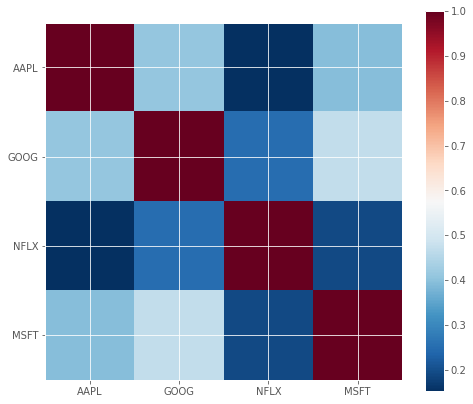

In [195]:
plt.imshow(corr, cmap='RdBu_r', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

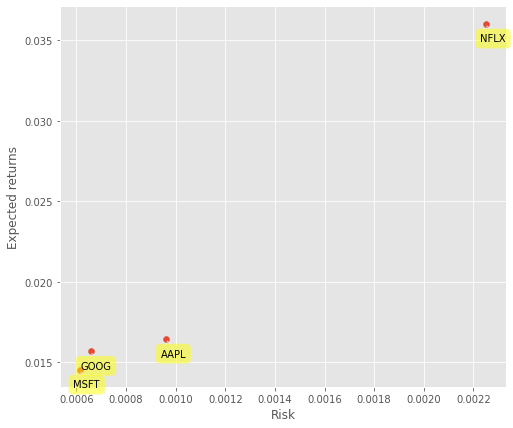

In [196]:
# here the graph shows the plotting of stock in terms of risk of buying the stock and profit of selling it.
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Risk')
plt.ylabel('Expected returns')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

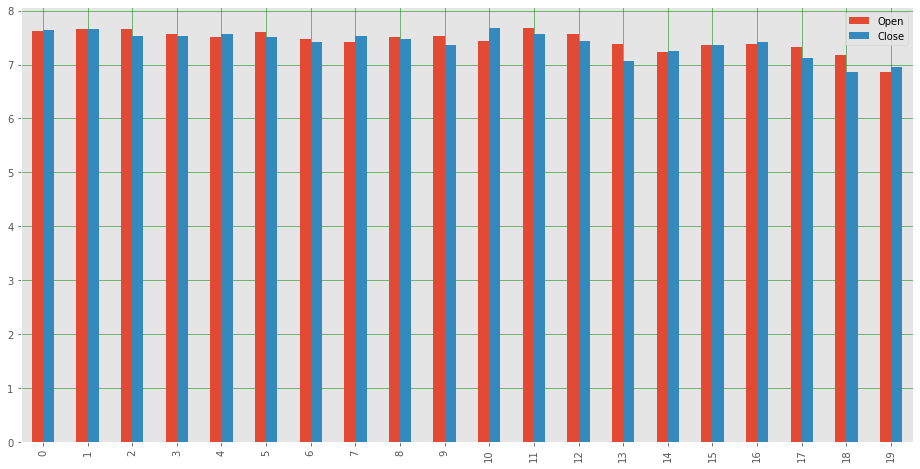

In [197]:
# Plot Open vs Close
dfa[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Model Training and Testing**

In [198]:
# Date format is DateTime and it will throw error while training so I have created seperate month, year and date entities
# Apple 
dfa['Year']=dfa['Date'].dt.year
dfa['Month']=dfa['Date'].dt.year
dfa['Day']=dfa['Date'].dt.year
dfa['Year']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
1764    2017
1765    2017
1766    2017
1767    2017
1768    2017
Name: Year, Length: 1769, dtype: int64

In [199]:
# Netflix 
dfn['Year']=dfn['Date'].dt.year
dfn['Month']=dfn['Date'].dt.year
dfn['Day']=dfn['Date'].dt.year
# Microsoft 
dfm['Year']=dfm['Date'].dt.year
dfm['Month']=dfm['Date'].dt.year
dfm['Day']=dfm['Date'].dt.year
# Google 
dfg['Year']=dfg['Date'].dt.year
dfg['Month']=dfg['Date'].dt.year
dfg['Day']=dfg['Date'].dt.year

In [200]:
dfreg = dfa.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (dfa['High'] - dfa['Low']) / dfa['Close'] * 100.0
dfreg['PCT_change'] = (dfa['Close'] - dfa['Open']) / dfa['Open'] * 100.0
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
0,6.539882,493729600.0,0.990606,0.271752
1,6.551187,601904800.0,1.091520,-0.102519
2,6.446983,552160000.0,2.123523,-1.590633
3,6.435065,477131200.0,1.400893,-0.552538
4,6.477847,447610800.0,1.386924,0.798864
...,...,...,...,...
1764,27.385668,88774400.0,0.900440,0.595240
1765,27.690971,127007600.0,1.433299,0.967636
1766,27.944603,134247600.0,1.252204,0.881730
1767,27.972786,97848400.0,0.906720,0.286271


In [201]:
aapl_df=dfa[['Day','Month','Year','High','Open','Low','Close']]
aapl_df.head(10)

,Day,Month,Year,High,Open,Low,Close
0,2010,2010,2010,7.660714,7.622500,7.585000,7.643214
1,2010,2010,2010,7.699643,7.664286,7.616071,7.656428
2,2010,2010,2010,7.686786,7.656428,7.526786,7.534643
3,2010,2010,2010,7.571429,7.562500,7.466072,7.520714
4,2010,2010,2010,7.571429,7.510714,7.466429,7.570714
5,2010,2010,2010,7.607143,7.600000,7.444643,7.503929
6,2010,2010,2010,7.491786,7.471071,7.372143,7.418571
7,2010,2010,2010,7.533214,7.423929,7.289286,7.523214
8,2010,2010,2010,7.516428,7.503929,7.465000,7.479643
9,2010,2010,2010,7.557143,7.533214,7.352500,7.354643


In [202]:
# for other stocks
nflx_df=dfn[['Day','Month','Year','High','Open','Low','Close']]
nflx_df.head(10)
msft_df=dfm[['Day','Month','Year','High','Open','Low','Close']]
msft_df.head(10)
goog_df=dfg[['Day','Month','Year','High','Open','Low','Close']]
goog_df.head(10)

,Day,Month,Year,High,Open,Low,Close
0,2010,2010,2010,313.579620,312.304413,310.954468,312.204773
1,2010,2010,2010,312.747742,312.418976,309.609497,310.829926
2,2010,2010,2010,311.761444,311.761444,302.047852,302.994293
3,2010,2010,2010,303.861053,303.562164,295.218445,295.940735
4,2010,2010,2010,300.498657,294.894653,293.455048,299.885956
5,2010,2010,2010,301.101410,301.101410,295.910858,299.432648
6,2010,2010,2010,297.963165,297.709106,292.902130,294.137512
7,2010,2010,2010,293.091431,287.168610,285.878448,292.448822
8,2010,2010,2010,295.990540,290.859772,290.316833,293.823669
9,2010,2010,2010,295.671753,295.562164,287.940735,288.917053


In [203]:
#separate Independent and dependent variable
X = aapl_df.iloc[:,3:6]
Y= aapl_df.iloc[:, 6]
print(X.shape)
print(Y.shape)

(1769, 3)
(1769,)


# **Splitting the dataset into train and test**

In [204]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,train_size=0.8,test_size=0.2, random_state=101)

In [205]:
print(x_train.shape) 
print(x_test.shape)  
print(y_train.shape)
print(y_test.shape) 
#y_test to be evaluated with y_pred for Diff models

(1415, 3)
(354, 3)
(1415,)
(354,)


# **Linear Regression Model Training and Testing**

In [206]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1230,29.077499,29.111403
89,9.360357,9.363395
801,15.301071,15.438995
1669,27.340000,27.294344
1503,26.807501,26.724816
...,...,...
7,7.523214,7.420172
563,22.057858,21.952542
988,20.282143,20.351763
1570,27.247499,27.294777


# **Plotting the data of linear regression (Actual VS Pred)**

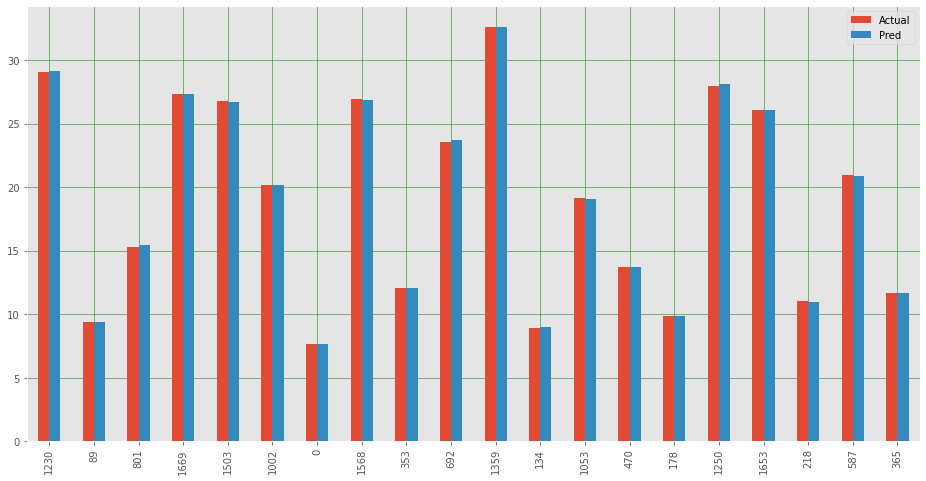

In [207]:
plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Function cost & Accuracy Linear regression**

In [208]:
# The mean squared error # cost function
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))

Mean squared error: 0.01


In [209]:
# The coefficient of determination: 1 is perfect prediction r2score & accuracy score.
print('Coefficient of determination: %.2f'
      % r2_score(y_test,y_pred))

Coefficient of determination: 1.00


# **Model comparison with other model**

Linear Model Cross-Validation

---

Basically Cross Validation is a technique using which Model is evaluated on the dataset on which it is not trained i.e. it can be a test data or can be another set as per availability or feasibility.

# **KNN model training & testing**

In [210]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

# **KNN Cross-Validation**

In [211]:
knn_kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print(results_kfold.mean()*100)

99.75077339374232


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [212]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_knn_pred})
df

,Actual,Predicted
1230,29.077499,28.903500
89,9.360357,9.362072
801,15.301071,15.403357
1669,27.340000,27.278000
1503,26.807501,26.833000
...,...,...
7,7.523214,7.421714
563,22.057858,21.948786
988,20.282143,20.436000
1570,27.247499,27.413000


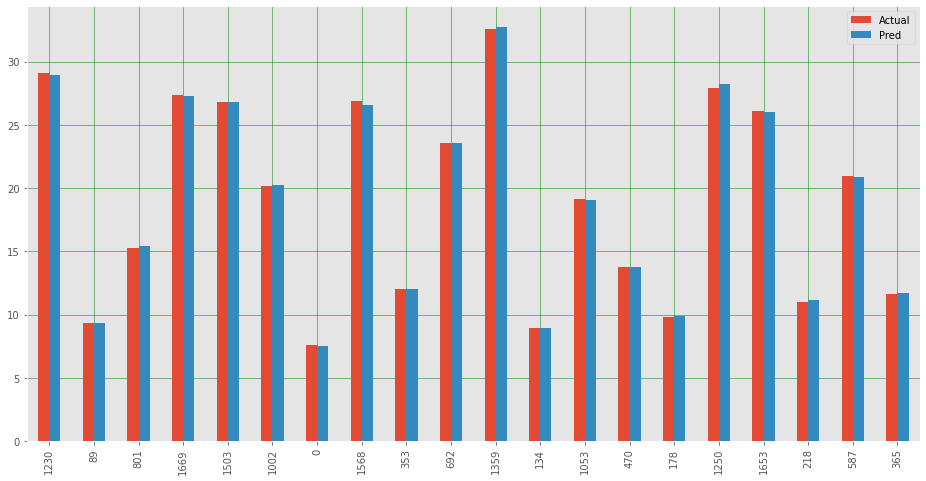

In [213]:
plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Function cost KNN**

In [214]:
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print(knn_mse)

0.14464117724971082
